In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Feature Engineering
#step-1 ---->Convert the categorical data into numerical--one hot encoding
df=pd.get_dummies(data,drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [4]:
y=df['charges']
X=df.drop(columns=['charges'])

In [5]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [6]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
print(X_train.shape)
print(y_train.shape)

(1070, 8)
(1070,)


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
print(model.coef_)
print(model.intercept_)

[  244.54800523   339.45273464   478.40622372  -115.24231522
 23863.15139547  -117.76416982  -818.45770565  -849.11537132]
-11468.428291197464


In [12]:
y_pred=model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
score=r2_score(y_test,y_pred)
print(score)

0.7734032901858253


In [15]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores.mean())

0.7468616243473741


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [17]:
y_pred=model.predict(X_test)

In [18]:
score=r2_score(y_test,y_pred)
print(score)

0.8868258357800989


In [19]:
scores=cross_val_score(model,X,y,cv=5)
print(scores.mean())

0.8550048871428639


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [21]:
#y_test=PolynomialRegression(3).fit(X_train,y_train).predict(X_test)

In [22]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn; seaborn.set()  # plot formatting

# #X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# #plt.scatter(X, y, color='black')
# axis = plt.axis()
# for degree in [1, 3, 5]:
#     y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
#     plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
# plt.xlim(-0.1, 1.0)
# plt.ylim(-2, 12)
# plt.legend(loc='best');

In [23]:
poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X_train, y_train)

In [24]:
model=LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [25]:
poly = poly_features.fit_transform(X_test)
model.score(poly, y_test)

0.8565884366434785

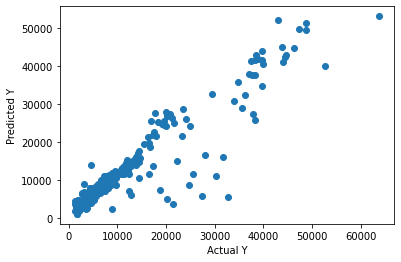

In [26]:
y_pred = model.predict(poly)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

In [27]:
def poly(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [28]:
poly_model=poly()
poly_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [29]:
y_pred=poly_model.predict(X_test)

In [30]:
score=r2_score(y_test,y_pred)
score

0.8477439941781529

In [31]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(poly_model,X,y,cv=5)
print(scores.mean())

0.8071390500134532


In [32]:
def poly3(degree=3,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [33]:
poly_model=poly3()
poly_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [34]:
y_pred=poly_model.predict(X_test)
score=r2_score(y_test,y_pred)
score

0.8565884366434785

In [35]:
scores=cross_val_score(poly_model,X,y,cv=5)
print(scores.mean())

0.8012883371915066


In [36]:
poly_model=poly3(degree=4)
poly_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [37]:
y_pred=poly_model.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)
scores=cross_val_score(poly_model,X,y,cv=5)
print(scores.mean())

0.8121176780534027
0.6641619948435842


In [38]:
poly_model=poly3(degree=5)
poly_model.fit(X_train,y_train)
y_pred=poly_model.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)
scores=cross_val_score(poly_model,X,y,cv=5)
print(scores.mean())

-0.23978895461175953
-0.3274137618286377


In [39]:
from sklearn.model_selection import validation_curve

In [40]:
degree=np.arange(0,10)
train_score,val_score=validation_curve(poly_model,X_train,y_train,'polynomialfeatures__degree',degree,cv=5)

c:\users\91832\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[0 1 2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\91832\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\91832\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\91832\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)


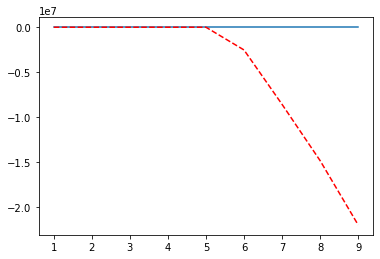

In [41]:
plt.plot(degree,train_score.mean(axis=1))
plt.plot(degree,val_score.mean(axis=1),'--r')

In [43]:
train_scores=[]
test_scores=[]
degree=np.arange(1,4)
for i in degree:
    poly_model=poly(i)
    poly_model.fit(X_train,y_train)
    score=cross_val_score(poly_model,X_train,y_train,scoring='r2',cv=5)
    train_scores.append(score.mean())
    y_pred=poly_model.predict(X_test)
    score=r2_score(y_test,y_pred)
    test_scores.append(score)
    

In [44]:
train_scores

[0.7399069762205197, 0.7879324025471062, 0.8069283746080476]

In [45]:
test_scores

[0.7734032901858253, 0.8477439941781529, 0.8565884366434785]

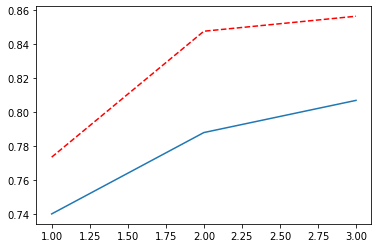

In [46]:
plt.plot(degree,train_scores)
plt.plot(degree,test_scores,'--r')

In [47]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

20623231.975448243

AttributeError: 'Series' object has no attribute 'reshape'